In [110]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numerical import DieGame
from simulate import DieGameSim

In [111]:
def mean(distr):
    scores, counts = distr
    numer = 0
    denom = 0
    for s, h in zip(scores, counts):
        numer += s * h
        denom += h
    return numer / denom

In [112]:
def std_dev(distr, samp=False):
    scores, counts = distr
    mu = mean(distr)
    numer = 0
    denom = 0
    for s, h in zip(scores, counts):
        numer += np.power((s - mu), 2) * h
        denom += h
    if samp:
        denom -= 1
    return np.sqrt(numer / denom)
        

In [113]:
def plot_scores(distr, title, ax=None):
    
    x, y = distr
    y = y / np.max(y)
    
    if ax is None:
        plt.bar(x, y)
        plt.grid()
        plt.xlabel('score')
        plt.ylabel('counts (normalized)')
        plt.title(title)
    else:
        ax.bar(x, y)
        ax.grid()
        ax.set_xlabel('score')
        ax.set_ylabel('counts (noralized)')
        ax.xaxis
        ax.set_title(title)


In [114]:
sim_samps = int(1e5)

# Q1. threshold = 100

In [115]:
threshold = 100
W = 11

In [116]:
game = DieGame(threshold, W)
scores = game.get_scores()

In [117]:
game_sim = DieGameSim(threshold, W, samps=sim_samps)
scores_sim = game_sim.get_scores()

In [118]:
mean(scores)

22.615715302070278

In [119]:
mean(scores_sim)

22.57947

In [120]:
std_dev(scores)

18.442428050729493

In [121]:
std_dev(scores_sim, samp=True)

18.425241366513877

###  plots

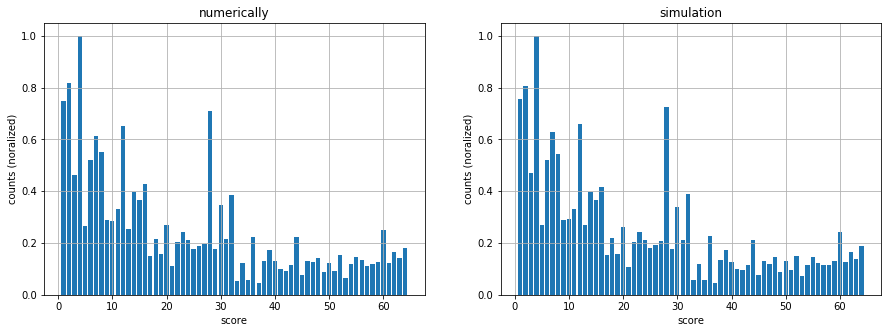

In [122]:
fig = plt.figure(figsize=(15, 5))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
plot_scores(scores, 'numerically', ax1)
plot_scores(scores_sim, 'simulation', ax2)

# Q2: threshold = 1000

In [123]:
threshold = 1000
W = 11

In [124]:
game = DieGame(threshold, W)
scores = game.get_scores()

In [125]:
game_sim = DieGameSim(threshold, W, samps=sim_samps)
scores_sim = game_sim.get_scores()

In [126]:
mean(scores)

22.03726971977112

In [127]:
mean(scores_sim)

21.92755

In [128]:
std_dev(scores)

18.29018408238545

In [129]:
std_dev(scores_sim, samp=True)

18.250506617828943

###  plots

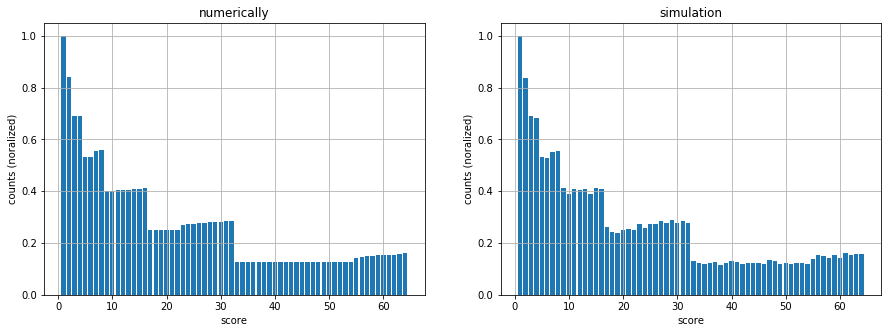

In [130]:
fig = plt.figure(figsize=(15, 5))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
plot_scores(scores, 'numerically', ax1)
plot_scores(scores_sim, 'simulation', ax2)

turn up sim_samps for greater precision

# Q3: threshold = 100

### numerically

In [131]:
steps = game.get_steps()

In [132]:
steps_sim = game_sim.get_steps()

In [133]:
mean(steps)

52.269839578270314

In [134]:
mean(steps_sim)

52.28985

In [135]:
std_dev(steps)

7.495539712541826

In [136]:
std_dev(steps_sim)

7.501806247664627

# Q4: visualization

In [137]:
def mean_data(W, thresh):
    arr1 = []
    for a in W:
        arr2 = []
        for t in thresh:
            game = DieGame(threshold=t, W=a)
            arr2.append(mean(game.get_scores()))
        arr1.append(np.array(arr2))

    return np.array(arr1)

In [138]:
def plot_contour(means, W, thresh, levels=100):
    tt, aa = np.meshgrid(thresh, W)
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    cont = ax.contourf(tt, aa, means, levels, cmap='viridis')

    ax.set_xlabel('threshold')
    ax.set_ylabel('W')
    fig.colorbar(cont)
    
    plt.show()

In [139]:
W = np.arange(1, 100, 1)
thresh = np.arange(1, 100, 1)
means = mean_data(W, thresh)

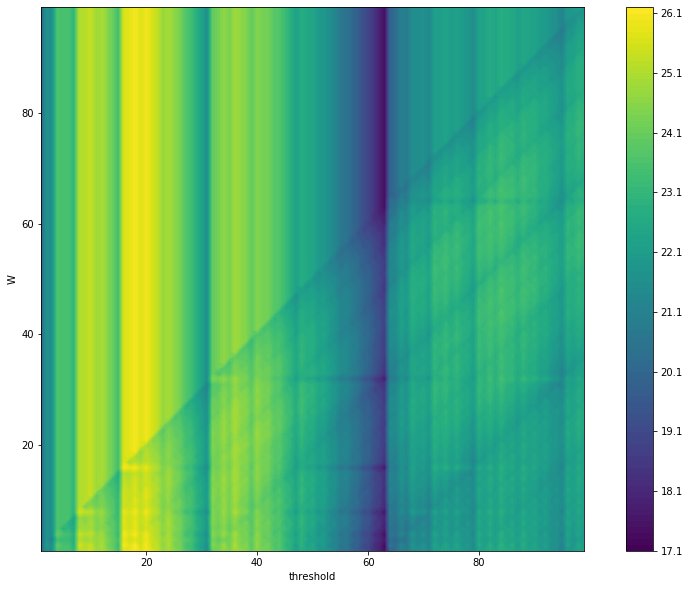

In [140]:
plot_contour(means, W, thresh)